Preparation of contact pattern matrix and $$\beta_{home}$$

# Transforming The Above Files:
### One should choose the division set for the model via the variable <b>'cell_name'</b> in the <i>indices.py</i> file in the model. The options are :
* 20
* 250
* 870

### In order to run this notebook One should make sure the above files exist:
* Data/division_choice
    * Data/division_choice/'cell_name'/cell2name.xlsx
    * Data/division_choice/'cell_name'/mat_macro_model_df.pickle
    * Data/division_choice/'cell_name'/taz2cell.xlsx
* Data/raw
    * Data/raw/pop2taz.xlsx
    * Data/raw/religion2taz.csv

    * Data/raw/leisure_mtx.csv
    * Data/raw/work_mtx.csv
    * Data/raw/school_mtx.csv

    * Data/raw/secularism_base_home.xlsx
    * Data/raw/haredi_base_home.xlsx
    * Data/raw/arabs_base_home.xlsx

    * Data/raw/taz_home_stay_by_periods.pickle
    
    * Data/raw/Summary_Home_0_TAZ.txt


### This Notebook generates the above files:
* Data/parameters
    - Data/parameters/beta_home.pickle
    - Data/parameters/stay_home_idx.pickle
    - Data/parameters/routine_t.pickle

* Data/demograph
    - Data/demograph/age_dist_area.csv
    - Data/demograph/religion_dis.csv
    - Data/demograph/sick_prop.csv

* Data/base_contact_mtx
    - Data/base_contact_mtx/full_home_mtx.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_school.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_work.csv
    - Data/base_contact_mtx/full_leisure_mtx_routine.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_bb.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_100_meters.csv
    - Data/base_contact_mtx/full_work_mtx_no_school.csv
    - Data/base_contact_mtx/full_work_mtx_no_work.csv
    - Data/base_contact_mtx/full_work_mtx_routine.csv
    - Data/base_contact_mtx/full_work_mtx_no_bb.csv
    - Data/base_contact_mtx/full_work_mtx_no_100_meters.csv
* Data/stay home
    - Data/stay_home/no_school.csv              
    - Data/stay_home/no_work.csv                
    - Data/stay_home/routine.csv                
    - Data/stay_home/no_bb.csv
    - Data/stay_home/no_100_meters.csv

# Imports

In [86]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
import scipy
from scipy import optimize
from scipy.sparse import csr_matrix
import sys
import os
sys.path.append('../SEIR_full/')
sys.path.append('..')
from SEIR_full.indices import *
from SEIR_full.helper_func import *
%matplotlib inline

# Data Creation

## Consts

In [87]:
cell_name = '250'

## Creating demograph/age_dist_area.csv

In [88]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)

In [89]:
pop_dist.columns

Index(['אזור 2630', ' מודל מקור', 'תכולת אזורי תנועה במודל המקור',
       'כלול באזור תנועה (1250) ', 'סמל ישוב', 'שם היישוב/ ים',
       'אזור סטטיסטי ביישוב', 'פירוט האזור', 'שם ישוב, שכונה, מיתקן או רחובות',
       'שימוש קרקע עיקרי', 'ערכי שימושי קרקע', 'אוכלוסייה', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'גילאים', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'מקושר ל 1250', 'מקושר ל 250',
       'מקושר ל 33', 'נפה', 'מחוז', 'שטח (מ"ר)'],
      dtype='object')

In [90]:
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])

In [91]:
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])

In [92]:
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop
1,4.46203e-05,4.73732e-05,5.3682e-05,8.167e-05,4.66849e-05,3.5788e-05,1.50264e-05,1.58293e-05,2.14498e-05,2.13351e-05,2.54645e-05,2.25969e-05,1.51411e-05,5.27643e-06,2.40881e-06,5.39114e-06,1,0.000460
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.000000
5,1.23881e-05,1.05529e-05,7.57053e-06,6.19407e-06,4.5882e-06,6.19407e-06,7.91465e-06,1.05529e-05,9.97934e-06,8.60288e-06,6.19407e-06,7.34112e-06,8.71758e-06,1.04382e-05,9.29111e-06,8.14406e-06,5,0.000135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0.000239275,0.000199472,0.00016724,0.000167699,0.000135008,0.000105185,7.30671e-05,5.9876e-05,5.59761e-05,4.59967e-05,3.06262e-05,1.92704e-05,1.60587e-05,1.06676e-05,8.25876e-06,8.14406e-06,2626,0.001342
2627,0.000137187,0.00012262,0.000113443,0.000110576,8.78641e-05,6.80201e-05,4.64555e-05,4.46203e-05,3.93438e-05,3.48703e-05,1.88116e-05,1.3994e-05,9.1764e-06,5.16173e-06,5.27643e-06,7.68524e-06,2627,0.000865
2628,0.000279536,0.000242945,0.000225625,0.000214154,0.000178252,0.000135925,9.81875e-05,8.06376e-05,7.67377e-05,6.21701e-05,4.06056e-05,2.62675e-05,1.97293e-05,1.23881e-05,1.07823e-05,1.04382e-05,2628,0.001714
2629,0.000222184,0.000217825,0.000191787,0.000182381,0.000193163,0.000192819,0.00019821,0.000188919,0.00019236,0.000187199,0.000162422,0.000129731,0.000114705,8.87817e-05,6.49231e-05,6.53819e-05,2629,0.002593


In [93]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [94]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']

In [95]:
taz2cell

,id,new_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164
...,...,...
2625,2626,2000228
2626,2627,2000228
2627,2628,2000228
2628,2629,2000229


In [96]:
pop_cell = pop_dist.merge(taz2cell, left_on='id', right_on='id')
pop_cell['new_id'] = pop_cell['new_id'].astype(str)
pop_cell.sort_values(by='new_id')

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop,new_id
1547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1548,0.000000,2000001
1138,0.000125946,0.00012239,0.000110346,0.000105987,8.12112e-05,6.84789e-05,5.70084e-05,5.19614e-05,4.61114e-05,3.81968e-05,2.67263e-05,2.14498e-05,1.55999e-05,8.94699e-06,5.27643e-06,8.25876e-06,1139,0.000894,2000001
1139,5.76966e-05,5.49437e-05,5.4829e-05,5.94172e-05,4.72585e-05,3.67056e-05,2.70704e-05,2.78733e-05,2.83321e-05,2.25969e-05,1.75499e-05,1.31911e-05,9.52052e-06,6.8823e-06,4.12938e-06,4.24409e-06,1140,0.000472,2000001
1140,2.03028e-05,1.97293e-05,1.77793e-05,1.70911e-05,1.30764e-05,1.10117e-05,9.1764e-06,8.37347e-06,7.45583e-06,6.07937e-06,4.24409e-06,3.44115e-06,2.52351e-06,1.37646e-06,8.02935e-07,1.26176e-06,1141,0.000144,2000001
1141,4.92085e-05,4.7832e-05,4.31291e-05,4.14085e-05,3.17733e-05,2.67263e-05,2.22528e-05,2.03028e-05,1.80087e-05,1.49117e-05,1.04382e-05,8.37347e-06,6.07937e-06,3.44115e-06,2.06469e-06,3.21174e-06,1142,0.000349,2000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,3.73938e-05,2.85616e-05,2.67263e-05,2.55792e-05,3.3838e-05,2.84468e-05,2.47763e-05,1.43381e-05,1.47969e-05,1.66322e-05,1.66322e-05,1.89263e-05,1.77793e-05,1.37646e-05,8.48817e-06,8.71758e-06,1324,0.000335,2000250
1324,2.67263e-05,2.0991e-05,1.91557e-05,1.45675e-05,1.85822e-05,1.83528e-05,1.36499e-05,9.40581e-06,9.40581e-06,8.14406e-06,8.60288e-06,9.52052e-06,1.02087e-05,7.45583e-06,4.5882e-06,5.16173e-06,1325,0.000205,2000250
1326,1.96146e-05,2.21381e-05,1.7894e-05,8.60288e-06,9.97934e-06,8.37347e-06,8.83229e-06,1.02087e-05,1.02087e-05,7.68524e-06,5.04702e-06,3.55586e-06,6.07937e-06,4.81761e-06,1.72058e-06,1.26176e-06,1327,0.000146,2000250
1321,2.67263e-05,2.0991e-05,1.91557e-05,1.45675e-05,1.85822e-05,1.83528e-05,1.36499e-05,9.40581e-06,9.40581e-06,8.14406e-06,8.60288e-06,9.52052e-06,1.02087e-05,7.45583e-06,4.5882e-06,5.16173e-06,1322,0.000205,2000250


In [97]:
def make_pop(df):
    df = df.iloc[:,0:-2]
    return df.sum(axis=0)

In [98]:
pop_cell = pop_cell.groupby(by='new_id').apply(lambda df: make_pop(df))

In [99]:
pop_cell

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id
new_id,,,,,,,,,,,,,,,,,
2000001,0.000667,0.000689,0.000611,0.000496,0.000380,0.000332,0.000340,0.000345,0.000337,0.000267,0.000181,0.000150,0.000124,0.000102,0.000067,0.000073,19215.0
2000002,0.000997,0.001007,0.000962,0.000895,0.000707,0.000606,0.000476,0.000504,0.000451,0.000359,0.000295,0.000232,0.000164,0.000116,0.000092,0.000105,17042.0
2000003,0.001051,0.001049,0.000971,0.000935,0.000779,0.000623,0.000481,0.000459,0.000406,0.000355,0.000291,0.000216,0.000147,0.000102,0.000076,0.000078,11845.0
2000004,0.000251,0.000242,0.000223,0.000222,0.000213,0.000205,0.000145,0.000139,0.000119,0.000112,0.000108,0.000097,0.000069,0.000056,0.000047,0.000067,4370.0
2000005,0.000384,0.000401,0.000391,0.000369,0.000375,0.000322,0.000252,0.000237,0.000220,0.000203,0.000176,0.000147,0.000122,0.000109,0.000088,0.000118,3264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000246,0.000750,0.000725,0.000570,0.000484,0.000439,0.000362,0.000376,0.000297,0.000231,0.000191,0.000171,0.000157,0.000143,0.000095,0.000059,0.000076,113180.0
2000247,0.000724,0.000647,0.000464,0.000278,0.000346,0.000307,0.000305,0.000235,0.000165,0.000131,0.000104,0.000096,0.000085,0.000069,0.000035,0.000031,55610.0
2000248,0.000269,0.000276,0.000247,0.000186,0.000178,0.000147,0.000153,0.000152,0.000149,0.000122,0.000096,0.000104,0.000107,0.000096,0.000050,0.000042,11078.0


In [100]:
A

{0: '0-4',
 1: '5-9',
 2: '10-19',
 3: '20-29',
 4: '30-39',
 5: '40-49',
 6: '50-59',
 7: '60-69',
 8: '70+'}

In [101]:
pop_cell['10-19'] = pop_cell['10-14'] + pop_cell['15-19']
pop_cell['20-29'] = pop_cell['20-24'] + pop_cell['25-29']
pop_cell['30-39'] = pop_cell['30-34'] + pop_cell['35-39']
pop_cell['40-49'] = pop_cell['40-44'] + pop_cell['45-49']
pop_cell['50-59'] = pop_cell['50-54'] + pop_cell['55-59']
pop_cell['60-69'] = pop_cell['60-64'] + pop_cell['65-69']
pop_cell['70+'] = pop_cell['70-74'] + pop_cell['75+']
pop_cell = pop_cell[list(A.values())]
pop_cell

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
new_id,,,,,,,,,
2000001,0.000667,0.000689,0.001106,0.000712,0.000686,0.000605,0.000331,0.000226,0.000140
2000002,0.000997,0.001007,0.001857,0.001312,0.000979,0.000809,0.000527,0.000280,0.000198
2000003,0.001051,0.001049,0.001906,0.001402,0.000940,0.000761,0.000507,0.000249,0.000154
2000004,0.000251,0.000242,0.000445,0.000418,0.000284,0.000231,0.000205,0.000125,0.000114
2000005,0.000384,0.000401,0.000760,0.000698,0.000489,0.000423,0.000323,0.000232,0.000206
...,...,...,...,...,...,...,...,...,...
2000246,0.000750,0.000725,0.001054,0.000800,0.000673,0.000422,0.000327,0.000238,0.000135
2000247,0.000724,0.000647,0.000742,0.000653,0.000539,0.000297,0.000201,0.000154,0.000066
2000248,0.000269,0.000276,0.000434,0.000325,0.000306,0.000271,0.000199,0.000203,0.000092


In [17]:
pop_cell = pop_cell / pop_cell.sum().sum()

In [18]:
pop_cell.reset_index(inplace=True)
pop_cell.columns = ['cell_id'] + list(A.values())

In [19]:
pop_cell

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,2000001,0.000667,0.000689,0.001106,0.000712,0.000686,0.000605,0.000331,0.000226,0.000140
1,2000002,0.000997,0.001007,0.001857,0.001312,0.000979,0.000809,0.000527,0.000280,0.000198
2,2000003,0.001051,0.001049,0.001906,0.001402,0.000940,0.000761,0.000507,0.000249,0.000154
3,2000004,0.000251,0.000242,0.000445,0.000418,0.000284,0.000231,0.000205,0.000125,0.000114
4,2000005,0.000384,0.000401,0.000760,0.000698,0.000489,0.000423,0.000323,0.000232,0.000206
...,...,...,...,...,...,...,...,...,...,...
245,2000246,0.000750,0.000725,0.001054,0.000800,0.000673,0.000422,0.000327,0.000238,0.000135
246,2000247,0.000724,0.000647,0.000742,0.000653,0.000539,0.000297,0.000201,0.000154,0.000066
247,2000248,0.000269,0.000276,0.000434,0.000325,0.000306,0.000271,0.000199,0.000203,0.000092
248,2000249,0.000253,0.000276,0.000414,0.000299,0.000306,0.000313,0.000223,0.000179,0.000107


In [20]:
pop_cell.to_csv('../Data/demograph/age_dist_area.csv')

## Creating demograph/religion_dis.csv

In [21]:
religion2taz = pd.read_csv('../Data/raw/religion2taz.csv')
religion2taz.sort_values(by='taz_id', inplace=True)
religion2taz.columns = ['id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian']
religion2taz['Jewish'] = religion2taz['Orthodox'] + religion2taz['Sacular']

In [22]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [23]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']

In [24]:
religion2taz = religion2taz.merge(taz2cell, on='id')
religion2taz['new_id'] = religion2taz['new_id'].astype(str)
religion2taz.sort_values(by='new_id', inplace=True)

In [25]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135
...,...,...
2626,2626,0.001342
2627,2627,0.000865
2628,2628,0.001714
2629,2629,0.002593


In [26]:
religion2taz = religion2taz.merge(pop_dist, on='id')
religion2taz.sort_values(by='id', inplace=True)

In [27]:
religion2taz.sort_values(by='new_id').head(20)

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop
0,1548,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000001,0.000000
1,1139,0.283936,0.0,0.0,0.706577,0.009487,0.0,0.990513,2000001,0.000894
2,1140,0.281287,0.0,0.0,0.709320,0.009392,0.0,0.990608,2000001,0.000472
3,1141,0.282081,0.0,0.0,0.708416,0.009503,0.0,0.990497,2000001,0.000144
4,1142,0.282939,0.0,0.0,0.707490,0.009571,0.0,0.990429,2000001,0.000349
5,1143,0.026737,0.0,0.0,0.972986,0.000277,0.0,0.999723,2000001,0.000182
6,1216,0.104691,0.0,0.0,0.892832,0.002477,0.0,0.997523,2000001,0.001195
7,1549,0.283936,0.0,0.0,0.706577,0.009487,0.0,0.990513,2000001,0.000765
8,1218,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000001,0.000000
9,1550,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000001,0.000000


In [28]:
cell_num = len(list(set(religion2taz['new_id'])))

factor = pd.DataFrame({'new_id': list(set(religion2taz['new_id'])),
               'orth_factor': [1]*cell_num,
               'arab_factor': [1]*cell_num,}).sort_values(by='new_id')
factor = factor.reset_index().drop(['index'], axis=1)
factor

,new_id,orth_factor,arab_factor
0,2000001,1,1
1,2000002,1,1
2,2000003,1,1
3,2000004,1,1
4,2000005,1,1
...,...,...,...
245,2000246,1,1
246,2000247,1,1
247,2000248,1,1
248,2000249,1,1


In [29]:
factor.iloc[:,1] = pd.Series(
                        [1, 
                         0.48/0.41, 
                         0.13/0.04,
                         0.05/0.02, 
                         1,
                         1,
                         1,
                         1,
                         1,
                         1, 
                         0.1/0.05,
                         1,
                         1,
                         1,
                         0.82/0.6,
                         1, 
                         1, 
                         1, 
                         1,
                         0.24/0.36])
factor.iloc[:,2] = pd.Series(
                        [0.38/0.01, 
                         1, 
                         0.106/0.01,
                         0.36/0.14, 
                         0.65/0.4,
                         1.1/0.38,
                         1.1/0.1,
                         0.15/0.07,
                         0.6/0.3,
                         1, 
                         1,
                         1,
                         1,
                         1,
                         1,
                         1, 
                         1, 
                         1, 
                         1.3/0.8,
                         1])
factor

,new_id,orth_factor,arab_factor
0,2000001,1.000000,38.000000
1,2000002,1.170732,1.000000
2,2000003,3.250000,10.600000
3,2000004,2.500000,2.571429
4,2000005,1.000000,1.625000
...,...,...,...
245,2000246,NaN,NaN
246,2000247,NaN,NaN
247,2000248,NaN,NaN
248,2000249,NaN,NaN


In [30]:
religion2taz = religion2taz.merge(factor, on='new_id')
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop,orth_factor,arab_factor
0,1,0.029482,0.0,0.0,0.970310,0.000207,0.0,0.999793,43,0.000460,1.0,1.000
1,460,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,43,0.000000,1.0,1.000
2,461,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,43,0.000000,1.0,1.000
3,462,0.006923,0.0,0.0,0.992990,0.000087,0.0,0.999913,43,0.000524,1.0,1.000
4,463,0.007071,0.0,0.0,0.992770,0.000158,0.0,0.999842,43,0.001048,1.0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2625,2562,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,62_arab,0.000180,1.0,1.625
2626,2563,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,62_arab,0.000063,1.0,1.625
2627,2626,0.000000,0.0,0.0,0.000303,0.999697,0.0,0.000303,62_arab,0.001342,1.0,1.625
2628,2627,0.000000,0.0,0.0,0.002635,0.997365,0.0,0.002635,62_arab,0.000865,1.0,1.625


In [31]:
religion2taz['Orthodox'] = religion2taz['Orthodox']*religion2taz['orth_factor']
religion2taz['Sacular'] = religion2taz['Sacular'] - religion2taz['Orthodox']*(religion2taz['orth_factor']-1)
religion2taz['Muslim'] = religion2taz['Muslim'] * religion2taz['arab_factor']

In [30]:
def make_pop(df):
    df = df.iloc[:,1:8].multiply(df['tot_pop'], axis='index')
    return df.sum(axis=0)

In [31]:
religion2taz = religion2taz.groupby(by='new_id').apply(lambda df: make_pop(df))

In [32]:
tmp = religion2taz[['Druze', 'Other', 'Muslim', 'Christian', 'Jewish']].sum(axis=1)
tmp.loc[tmp == 0] = 1
religion2taz = religion2taz.divide(tmp, axis=0)

In [33]:
religion2taz.reset_index(inplace=True)

In [34]:
religion2taz.columns = ['cell_id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian', 'Jewish']
religion2taz

,cell_id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
0,2000001,0.203647,0.0,0.0,0.790054,0.006299,0.0,0.993701
1,2000002,0.283772,0.0,0.0,0.706747,0.009481,0.0,0.990519
2,2000003,0.281337,0.0,0.0,0.709221,0.009442,0.0,0.990558
3,2000004,0.286254,0.0,0.0,0.704173,0.009573,0.0,0.990427
4,2000005,0.284137,0.0,0.0,0.706381,0.009482,0.0,0.990518
...,...,...,...,...,...,...,...,...
245,2000246,0.146026,0.0,0.0,0.848349,0.005626,0.0,0.994374
246,2000247,0.132441,0.0,0.0,0.850322,0.017237,0.0,0.982763
247,2000248,0.154740,0.0,0.0,0.845076,0.000184,0.0,0.999816
248,2000249,0.055004,0.0,0.0,0.928742,0.016254,0.0,0.983746


In [35]:
religion2taz.to_csv('../Data/demograph/religion_dis.csv')

## Creating stay_home/ALL

In [81]:
home = pd.read_csv('../Data/raw/Summary_Home_0_TAZ.txt', delimiter='\t', encoding='utf-16')
home.columns = ['date', 'taz_id', 'stay', 'out']
home['date'] = pd.to_datetime(home['date'], dayfirst=True)
home['stay'] = home['stay'].apply(lambda x: x.replace(',','')).astype(int)
home['out'] = home['out'].apply(lambda x: x.replace(',','')).astype(int)
home['total'] = home['stay'] + home['out']
home['out_pct'] = home['out'] / home['total']
# home['city_parsed'] = home.city.apply(lambda x: x[:-7] if ('חרדים' in x or 'ערבים' in x) else x)
home.head()
len(set(home['taz_id']))

1886

In [82]:
home.describe()

,taz_id,stay,out,total,out_pct
count,143336.000000,143336.000000,143336.000000,143336.000000,143336.000000
mean,1286.067338,2730.430862,1862.738307,4593.169169,0.421920
std,783.451372,2737.015744,1851.321207,4128.533393,0.174742
min,1.000000,1.000000,1.000000,2.000000,0.000612
25%,601.000000,1047.000000,667.000000,2013.000000,0.290097
50%,1226.500000,2008.000000,1328.000000,3543.500000,0.433333
75%,2009.000000,3520.000000,2460.000000,5946.000000,0.561079
max,2630.000000,42522.000000,27568.000000,56052.000000,0.996865


In [83]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164


In [84]:
home = home.merge(taz2cell, on='taz_id')
len(set(home['cell_id']))

243

In [85]:
home

,date,taz_id,stay,out,total,out_pct,cell_id
0,2020-02-01,1,2249,1742,3991,0.436482,2000153
1,2020-02-02,1,1058,2932,3990,0.734837,2000153
2,2020-02-03,1,1144,2847,3991,0.713355,2000153
3,2020-02-04,1,1180,2810,3990,0.704261,2000153
4,2020-02-05,1,1112,2878,3990,0.721303,2000153
...,...,...,...,...,...,...,...
143331,2020-04-12,2630,4130,3395,7525,0.451163,2000230
143332,2020-04-13,2630,4110,3415,7525,0.453821,2000230
143333,2020-04-14,2630,4785,2740,7525,0.364120,2000230
143334,2020-04-15,2630,6060,1465,7525,0.194684,2000230


In [41]:
len(set(home['taz_id']))

1886

In [42]:
home_cell = home.groupby(['date', 'cell_id'])[['stay', 'out', 'total']].sum().reset_index()
home_cell['out_pct'] = home_cell['out'] / home_cell['total']
home_cell

,date,cell_id,stay,out,total,out_pct
0,2020-02-01,2000001,34776,27125,61901,0.438200
1,2020-02-01,2000002,66850,49210,116060,0.424005
2,2020-02-01,2000003,70220,39335,109555,0.359043
3,2020-02-01,2000004,13275,6520,19795,0.329376
4,2020-02-01,2000005,12885,3790,16675,0.227286
...,...,...,...,...,...,...
18463,2020-04-16,2000246,102505,64280,166785,0.385406
18464,2020-04-16,2000247,82906,44982,127888,0.351730
18465,2020-04-16,2000248,19878,14335,34213,0.418993
18466,2020-04-16,2000249,20133,13443,33576,0.400375


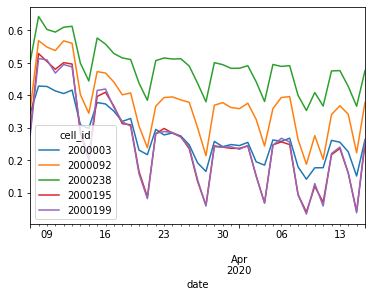

In [43]:
pivoted = pd.pivot_table(home_cell, index='date', columns='cell_id', values='out_pct')
pivoted[pivoted.index >= '2020-03-07'][np.random.choice(pivoted.columns, 5)].plot()

In [44]:
def robust_max(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[-n:])

def robust_min(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[:n])

global_max = pivoted.apply(robust_max)
global_min = pivoted.apply(robust_min)
# global_min, global_max = 0,1
span = global_max - global_min
relative_rate = pivoted.apply(lambda row: (row - global_min) / span, axis=1)

In [45]:
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return np.sqrt(variance)

def avg_by_dates(df, from_date, to_date, weights=None):
    filtered = df[(df.index >= from_date) & (df.index <= to_date)]
    if weights is None:
        return filtered.describe().T[['mean','std','min','max']]
    
    weights = pd.Series(weights)
    stats = filtered.describe().T[['min','max']]
    stats['mean'] = filtered.apply(lambda col: np.average(col, weights=weights))
    stats['std'] = filtered.apply(lambda col: weighted_std(col, weights=weights))
    return stats

In [46]:
result = dict()
result['routine'] = avg_by_dates(relative_rate, '2020-02-02', '2020-02-29')
result['no_school'] = avg_by_dates(relative_rate, '2020-03-14', '2020-03-16', 
                         weights={'2020-03-14': 2/7, '2020-03-15': 2.5/7, '2020-03-16': 2.5/7})
result['no_work'] = avg_by_dates(relative_rate, '2020-03-17', '2020-03-25', 
                       weights={i:1/14 if i.day in [17,18,24,25] else 1/7
                                  for i in pd.date_range('2020-03-17', '2020-03-25')})
result['no_100_meters'] = avg_by_dates(relative_rate, '2020-03-26', '2020-04-02', 
                              weights={i:1/14 if i.day in [26,2] else 1/7
                                       for i in pd.date_range('2020-03-26', '2020-04-02')})
result['no_bb'] = avg_by_dates(relative_rate, '2020-04-03', '2020-04-06', 
                         weights={i:5/14 if i.day in [5,6] else 1/7
                                  for i in pd.date_range('2020-04-03', '2020-04-06')})

In [47]:
# save
try:
    os.mkdir('../Data/stay_home')
except:
    pass
result['routine'].to_csv('../Data/stay_home/routine.csv')
result['no_school'].to_csv('../Data/stay_home/no_school.csv')
result['no_work'].to_csv('../Data/stay_home/no_work.csv')
result['no_100_meters'].to_csv('../Data/stay_home/no_100_meters.csv')
result['no_bb'].to_csv('../Data/stay_home/no_bb.csv')

## Creating demograph/sick_pop.csv

In [48]:
taz2sick = pd.read_csv('../Data/sick/taz2sick.csv')
taz2sick.head()

,taz_id,cases_prop
0,1,0.099284
1,2,0.099284
2,3,0.099284
3,4,0.099284
4,5,0.099284


In [49]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164


In [50]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135


In [51]:
taz2sick = taz2sick.merge(taz2cell, on='taz_id')
taz2sick.head()

,taz_id,cases_prop,cell_id
0,1,0.099284,2000153
1,2,0.099284,2000166
2,3,0.099284,2000164
3,4,0.099284,2000164
4,5,0.099284,2000164


In [52]:
taz2sick = taz2sick.merge(pop_dist, left_on='taz_id', right_on='id')
taz2sick.head()

,taz_id,cases_prop,cell_id,id,tot_pop
0,1,0.099284,2000153,1,0.000460
1,2,0.099284,2000166,2,0.000000
2,3,0.099284,2000164,3,0.000000
3,4,0.099284,2000164,4,0.000000
4,5,0.099284,2000164,5,0.000135


In [53]:
taz2sick['cases_prop'] = taz2sick['cases_prop'] * taz2sick['tot_pop']

In [54]:
def wheighted_average(df):
    tot = df['tot_pop'].sum()
    return (df['cases_prop'].sum() / tot)

taz2sick = taz2sick.groupby(by='cell_id')[['cases_prop', 'tot_pop']].apply(wheighted_average)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
taz2sick.name='cases_prop'

In [56]:
taz2sick

cell_id
2000001    0.137496
2000002    0.137496
2000003    0.137496
2000004    0.137496
2000005    0.137496
             ...   
2000246    0.083930
2000247    0.083930
2000248    0.083930
2000249    0.083930
2000250    0.083930
Name: cases_prop, Length: 250, dtype: float64

In [57]:
taz2sick.to_csv('../Data/demograph/sick_prop.csv')

# Data Loading

In [58]:
# import data:
with (open('../Data/division_choice/'+ cell_name + '/mat_macro_model_df.pickle', 'rb')) as openfile:
    OD_dict = pickle.load(openfile)

base_leisure = pd.read_csv('../Data/raw/leisure_mtx.csv',index_col=0)
base_work = pd.read_csv('../Data/raw/work_mtx.csv',index_col=0)
base_school = pd.read_csv('../Data/raw/school_mtx.csv',index_col=0)


stay_home_idx_school =  pd.read_csv('../Data/stay_home/no_school.csv',index_col=0)
stay_home_idx_school.index = stay_home_idx_school.index.astype(str)
stay_home_idx_work =  pd.read_csv('../Data/stay_home/no_work.csv',index_col=0)
stay_home_idx_work.index = stay_home_idx_work.index.astype(str)
stay_home_idx_routine =  pd.read_csv('../Data/stay_home/routine.csv',index_col=0)
stay_home_idx_routine.index = stay_home_idx_routine.index.astype(str)
stay_home_idx_no_100_meters =  pd.read_csv('../Data/stay_home/no_100_meters.csv',index_col=0)
stay_home_idx_no_100_meters.index = stay_home_idx_no_100_meters.index.astype(str)
stay_home_idx_no_bb =  pd.read_csv('../Data/stay_home/no_bb.csv',index_col=0)
stay_home_idx_no_bb.index = stay_home_idx_no_bb.index.astype(str)

religion_dist = pd.read_csv('../Data/demograph/religion_dis.csv',index_col=0)
age_dist_area = pd.read_csv('../Data/demograph/age_dist_area.csv',index_col=0)

home_secularism = pd.read_excel('../Data/raw/secularism_base_home.xlsx',index_col=0)
home_haredi = pd.read_excel('../Data/raw/haredi_base_home.xlsx',index_col=0)
home_arabs = pd.read_excel('../Data/raw/arabs_base_home.xlsx',index_col=0)

In [59]:
# fix_shahaf_bug
if cell_name=='250':
    if len(str(OD_dict[list(OD_dict.keys())[0]].columns[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].columns = pd.Index(G.values())
    if len(str(OD_dict[list(OD_dict.keys())[0]].index[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].index = pd.Index(G.values())

In [60]:
for k in OD_dict.keys():
    OD_dict[k].columns = pd.Index(G.values())
    OD_dict[k].index = pd.Index(G.values())

In [61]:
OD_dict.keys()

dict_keys([('no_work', 0), ('no_work', 1), ('no_work', 2), ('no_100_meters', 0), ('no_100_meters', 1), ('no_100_meters', 2), ('no_bb', 0), ('no_bb', 1), ('no_bb', 2), ('routine', 0), ('routine', 1), ('routine', 2), ('no_school', 0), ('no_school', 1), ('no_school', 2)])

In [62]:
age_dist_area

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,2000001,0.000667,0.000689,0.001106,0.000712,0.000686,0.000605,0.000331,0.000226,0.000140
1,2000002,0.000997,0.001007,0.001857,0.001312,0.000979,0.000809,0.000527,0.000280,0.000198
2,2000003,0.001051,0.001049,0.001906,0.001402,0.000940,0.000761,0.000507,0.000249,0.000154
3,2000004,0.000251,0.000242,0.000445,0.000418,0.000284,0.000231,0.000205,0.000125,0.000114
4,2000005,0.000384,0.000401,0.000760,0.000698,0.000489,0.000423,0.000323,0.000232,0.000206
...,...,...,...,...,...,...,...,...,...,...
245,2000246,0.000750,0.000725,0.001054,0.000800,0.000673,0.000422,0.000327,0.000238,0.000135
246,2000247,0.000724,0.000647,0.000742,0.000653,0.000539,0.000297,0.000201,0.000154,0.000066
247,2000248,0.000269,0.000276,0.000434,0.000325,0.000306,0.000271,0.000199,0.000203,0.000092
248,2000249,0.000253,0.000276,0.000414,0.000299,0.000306,0.000313,0.000223,0.000179,0.000107


In [63]:
base_leisure

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0-4,1.910947,0.785434,0.605625,0.947981,1.217311,0.539321,0.526174,0.327925,0.136674
5-9,0.855218,3.058522,1.270115,0.586938,0.994774,0.548865,0.307890,0.281533,0.096498
10-19,0.188896,0.833542,5.118978,0.980886,0.664389,0.573172,0.223943,0.129148,0.077123
20-29,0.216756,0.165483,1.147046,2.721855,1.030819,0.491379,0.301705,0.088583,0.054323
30-39,0.263324,0.231474,0.380568,0.938731,1.367406,0.614261,0.391434,0.205911,0.073415
40-49,0.098300,0.127266,0.312787,0.458589,0.688429,0.540939,0.255728,0.131058,0.066109
50-59,0.086537,0.105663,0.236436,0.604374,0.589119,0.457537,0.457947,0.236600,0.077892
60-69,0.072166,0.081541,0.124618,0.379717,0.528686,0.365015,0.373055,0.358650,0.143989
70+,0.035686,0.043422,0.112453,0.160497,0.271909,0.236009,0.190299,0.271175,0.190983


In [64]:
OD_dict['routine', 1].index

Index(['2000001', '2000002', '2000003', '2000004', '2000005', '2000006',
       '2000007', '2000008', '2000009', '2000010',
       ...
       '2000241', '2000242', '2000243', '2000244', '2000245', '2000246',
       '2000247', '2000248', '2000249', '2000250'],
      dtype='object', length=250)

In [65]:
stay_home_idx_work

,min,max,mean,std
cell_id,,,,
2000001,0.112821,0.500249,0.318334,0.115512
2000002,0.219895,0.595686,0.364086,0.119195
2000003,0.193450,0.595651,0.384136,0.125733
2000004,0.207268,0.529475,0.354989,0.104268
2000005,0.174121,0.533546,0.336119,0.120341
...,...,...,...,...
2000246,0.153166,0.525155,0.306825,0.111168
2000247,0.227741,0.555174,0.344410,0.116510
2000248,0.112864,0.561009,0.340342,0.132776


# Processing stay home index

In [66]:
# reordering and expanding vector for each period:
stay_home_idx_school = stay_home_idx_school['mean'].values
stay_home_idx_school[1] = stay_home_idx_school[0]

stay_home_idx_work = stay_home_idx_work['mean'].values
stay_home_idx_work[1] = stay_home_idx_work[0]

stay_home_idx_no_100_meters = stay_home_idx_no_100_meters['mean'].values
stay_home_idx_no_100_meters[1] = stay_home_idx_no_100_meters[0]

stay_home_idx_no_bb = stay_home_idx_no_bb['mean'].values
stay_home_idx_no_bb[1] = stay_home_idx_no_bb[0]

# expanding vectors:
stay_home_idx_school = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_school,
                                              size=len(GA))
stay_home_idx_work = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_work,
                                              size=len(GA))
stay_home_idx_no_100_meters = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_no_100_meters,
                                              size=len(GA))
stay_home_idx_no_bb = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_no_bb,
                                              size=len(GA))

IndexError: index 243 is out of bounds for axis 0 with size 243

In [67]:
# preparing model objects:
stay_idx_t = []
routine_vector = []
d_tot = 500

# first days of routine from Feb 21st - March 13th
d_routin = 9+13
for i in range(d_routin):
    stay_idx_t.append(1.0)
    routine_vector.append(0)

# first days of no school from March 14th - March 16th
d_school = 3
for i in range(d_school):
    stay_idx_t.append(stay_home_idx_school)
    routine_vector.append(1)

# without school and work from March 17th - March 25th
d_work = 9
for i in range(d_work):
    stay_idx_t.append(stay_home_idx_work)
    routine_vector.append(1)

# 100 meters constrain from March 26th - April 2nd
d_100 = 8
for i in range(d_100):
    stay_idx_t.append(stay_home_idx_no_100_meters)
    routine_vector.append(1)

# Bnei Brak quaranrine from April 3rd
for i in range(d_tot-(d_routin+d_school+d_work+d_100)):
    stay_idx_t.append(stay_home_idx_no_bb)
    routine_vector.append(1)

In [68]:
stay_idx_calibration = {
    'non_inter':{
        'work': stay_idx_t,
        'not_work': stay_idx_t
    }, 
    'inter': {
        'work': [0]*500,
        'not_work': [0]*500,
    }
}

routine_vector_calibration = {
    'non_inter':{
        'work': routine_vector,
        'not_work': routine_vector
    }, 
    'inter': {
        'work': [1]*500,
        'not_work': [1]*500,
    }
}

In [69]:
# save objects
with open('../Data/parameters/stay_home_idx.pickle', 'wb') as handle:
    pickle.dump(stay_idx_calibration, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../Data/parameters/routine_t.pickle', 'wb') as handle:
    pickle.dump(routine_vector_calibration, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Leisure Matrix

## routine

In [73]:
OD_dict['routine',2]

,300001,300002,300003,300004,300005,300006,300007,300008,300009,300010,...,300024,300025,300026,300027,300028,300029,300030,300031,300032,300033
300001,0.986049,0.001302,0.000182,0.000346,0.009429,0.000479,0.000518,0.000244,0.000127,0.000092,...,0.000107,0.000011,0.000018,0.000120,0.000044,0.000034,0.000012,0.000010,0.000024,0.000007
300002,0.000110,0.982663,0.005241,0.003940,0.003274,0.002517,0.000338,0.000967,0.000155,0.000070,...,0.000063,0.000007,0.000005,0.000056,0.000024,0.000016,0.000007,0.000013,0.000035,0.000004
300003,0.000042,0.012595,0.975086,0.008101,0.000524,0.000892,0.000309,0.000833,0.000149,0.000157,...,0.000129,0.000016,0.000013,0.000071,0.000033,0.000024,0.000012,0.000014,0.000030,0.000001
300004,0.000036,0.004274,0.003327,0.979691,0.000473,0.002180,0.000844,0.005494,0.000299,0.000656,...,0.000199,0.000031,0.000024,0.000116,0.000046,0.000040,0.000012,0.000019,0.000041,0.000005
300005,0.002635,0.008213,0.000575,0.001248,0.977017,0.004657,0.002218,0.000541,0.000256,0.000173,...,0.000183,0.000040,0.000026,0.000282,0.000090,0.000059,0.000022,0.000017,0.000038,0.000005
300006,0.000060,0.003598,0.000522,0.002998,0.002749,0.980841,0.005006,0.001998,0.000749,0.000152,...,0.000122,0.000014,0.000014,0.000063,0.000027,0.000024,0.000014,0.000011,0.000031,0.000004
300007,0.000099,0.000832,0.000242,0.001724,0.002032,0.007746,0.971452,0.002045,0.005443,0.000853,...,0.000263,0.000034,0.000023,0.000210,0.000070,0.000064,0.000038,0.000035,0.000036,0.000007
300008,0.000048,0.002385,0.000803,0.013414,0.000446,0.003660,0.002348,0.967355,0.001446,0.003724,...,0.000270,0.000045,0.000024,0.000199,0.000069,0.000059,0.000024,0.000026,0.000030,0.000007
300009,0.000024,0.000474,0.000170,0.000820,0.000211,0.001654,0.007052,0.001581,0.973577,0.004395,...,0.000356,0.000030,0.000025,0.000183,0.000088,0.000081,0.000073,0.000047,0.000077,0.000005
300010,0.000013,0.000228,0.000180,0.001699,0.000170,0.000449,0.001287,0.005055,0.005303,0.971596,...,0.000466,0.000081,0.000048,0.000153,0.000093,0.000109,0.000033,0.000047,0.000046,0.000003


In [70]:
############ 21.2-14.3 #############
full_leisure_routine = create_C_mtx_leisure_work(
    od_mat=OD_dict['routine',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 14.3-16.3 #############
full_leisure_no_school = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_school',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 17.3-25.3 #############
full_leisure_no_work = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_work',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 26.3-2.4 #############
full_leisure_no_100_meters = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_100_meters',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 3.4-6.4 #############
full_leisure_no_bb = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_bb',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

KeyError: '300001'

In [72]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_routine.npz', full_leisure_routine)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_school.npz', full_leisure_no_school)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_work.npz', full_leisure_no_work)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_100_meters.npz', full_leisure_no_100_meters)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_bb.npz', full_leisure_no_bb)

## work

In [73]:
# creating school- work matrix;
base_work_school = base_work.copy()
base_work_school.loc['0-4'] = base_school.loc['0-4']
base_work_school.loc['5-9'] = base_school.loc['5-9']
base_work_school['0-4'] = base_school['0-4']
base_work_school['5-9'] = base_school['5-9']

In [74]:
# creating eye matrix
eye_OD = OD_dict['routine', 1].copy()

for col in eye_OD.columns:
    eye_OD[col].values[:] = 0
eye_OD.values[[np.arange(eye_OD.shape[0])]*2] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [75]:
############ 21.2-14.3 #############
full_work_routine = create_C_mtx_leisure_work(
    od_mat=OD_dict['routine',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 14.3-16.3 #############
full_work_no_school = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_school',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 17.3-25.3 #############
full_work_no_work = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_work',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 26.3-2.4 #############
full_work_no_100_meters = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_100_meters',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 3.4-6.4 #############
full_work_no_bb = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_bb',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

In [76]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_routine.npz', full_work_routine)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_school.npz', full_work_no_school)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_work.npz', full_work_no_work)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_100_meters.npz', full_work_no_100_meters)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_bb.npz', full_work_no_bb)

## Home

In [77]:
full_home = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), 
                             columns=OD_dict['routine', 0].index)

In [78]:
religion_dist.set_index('cell_id', inplace=True)
religion_dist.index = religion_dist.index.astype(str)
religion_dist

,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
cell_id,,,,,,,
11,0.185980,0.000000,0.000000e+00,0.458991,0.355029,1.940938e-07,0.644971
11_betshemesh,0.484846,0.000000,0.000000e+00,0.501050,0.002032,0.000000e+00,0.997968
21,0.177966,0.000000,0.000000e+00,0.366010,0.160123,1.868575e-02,0.821191
22,0.040832,0.139189,0.000000e+00,0.609073,0.092481,8.167484e-02,0.686654
23,0.004214,0.000000,4.984116e-05,0.426478,0.518378,5.088025e-02,0.430691
24,0.001474,0.048861,0.000000e+00,0.264098,0.658857,2.670948e-02,0.265572
29,0.000493,0.248076,0.000000e+00,0.708899,0.042532,0.000000e+00,0.709392
31,0.029402,0.017138,0.000000e+00,0.808637,0.111583,3.323917e-02,0.838039
32,0.005536,0.000001,0.000000e+00,0.438949,0.555514,2.747023e-07,0.444485


In [79]:
# fill the matrix:
for index in list(full_home.index):
    religion_area = religion_dist.loc[index[1]].copy()
    cell_val = religion_area['Orthodox'] * home_haredi.loc[index[0]][index[2]] + \
                religion_area['Sacular'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Christian'] * home_arabs.loc[index[0]][index[2]] + \
                religion_area['Other'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Druze'] * home_arabs.loc[index[0]][index[2]] + \
                religion_area['Muslim'] * home_arabs.loc[index[0]][index[2]]
    full_home.loc[index] = (eye_OD.loc[index[1]] * cell_val) / age_dist_area[index[2]]

full_home = csr_matrix(full_home.unstack().reorder_levels(['area','age']).sort_index().values.astype(float))

In [80]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_home.npz', full_home)

# $$\beta_{home}$$

In [82]:
# Calculating beta home
beta_home = 0.8 * full_home.unstack().reorder_levels(['area','age']).sort_index().sum(axis=1)/9

AttributeError: unstack not found

In [ ]:
# Save beta_home
with open('../Data/parameters/beta_home.pickle', 'wb') as handle:
    pickle.dump(beta_home.values, handle, protocol=pickle.HIGHEST_PROTOCOL)